In [2]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz


--2024-07-11 15:31:14--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 52.217.126.145, 3.5.21.105, 52.217.206.193, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|52.217.126.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz’

beans_dataset.tar.g 100%[===================>] 171.46M  42.9MB/s    in 4.4s    

2024-07-11 15:31:19 (38.9 MB/s) - ‘beans_dataset.tar.gz’ saved [179790562/179790562]



In [3]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
extract_tar_gz('/content/beans_dataset.tar.gz', '/content/')

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Normalization

In [5]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'beans/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(227,227),
    batch_size=32
)

Found 1034 files belonging to 3 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'beans/validation',
    labels='inferred',
    label_mode='categorical',
    image_size=(227,227),
    batch_size=32
)

Found 133 files belonging to 3 classes.


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'beans/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(227,227),
    batch_size=32
)

Found 128 files belonging to 3 classes.


In [8]:
train_imgs= train_set.map(lambda imgs, labels: imgs)
normalization_layer = Normalization(axis=-1)
normalization_layer.adapt(train_imgs)
train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

validation_set_normalized = validation_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
test_set_normalized = test_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))


In [9]:
model= tf.keras.Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(500, 500, 3), strides=4, padding='valid'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(256, (5, 5), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 256)       0         
 g2D)                                                            
                                                                 
Total params: 649600 (2.48 MB)
Trainable params: 649600 (2.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model= tf.keras.Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(500, 500, 3), strides=4, padding='valid'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(256, (5, 5), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same'))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 123, 123, 96)      34944     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 61, 61, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 384)       885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 384)      

In [11]:
from tensorflow.keras import initializers

In [12]:
weight_initializer= initializers.RandomNormal(mean=0.0, stddev=0.01, seed=417)

In [13]:
model= tf.keras.Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(227, 227, 3), strides=4, padding='valid', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(256, (5, 5), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(Conv2D(256, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_initializer=weight_initializer))
model.add(Dense(4096, activation='relu', kernel_initializer=weight_initializer))
model.add(Dense(3, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 384)      

In [14]:
opt= tf.keras.optimizers.SGD(learning_rate=0.01)
loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics= ['accuracy']

model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [21]:
history=model.fit(train_set_normalized, epochs=40, validation_data=validation_set_normalized)

Epoch 1/40
33/33 [==============================] - 5s 137ms/step - loss: 0.4656 - accuracy: 0.8095 - val_loss: 0.4144 - val_accuracy: 0.8421
Epoch 2/40
33/33 [==============================] - 6s 137ms/step - loss: 0.3644 - accuracy: 0.8462 - val_loss: 0.4119 - val_accuracy: 0.8271
Epoch 3/40
33/33 [==============================] - 7s 197ms/step - loss: 0.4241 - accuracy: 0.8501 - val_loss: 0.5999 - val_accuracy: 0.7444
Epoch 4/40
33/33 [==============================] - 5s 111ms/step - loss: 0.3683 - accuracy: 0.8491 - val_loss: 0.4352 - val_accuracy: 0.8271
Epoch 5/40
33/33 [==============================] - 6s 157ms/step - loss: 0.4069 - accuracy: 0.8385 - val_loss: 0.4318 - val_accuracy: 0.8496
Epoch 6/40
33/33 [==============================] - 4s 117ms/step - loss: 0.3450 - accuracy: 0.8491 - val_loss: 0.4289 - val_accuracy: 0.8647
Epoch 7/40
33/33 [==============================] - 6s 154ms/step - loss: 0.3157 - accuracy: 0.8714 - val_loss: 0.5290 - val_accuracy: 0.8120
Epoch 

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


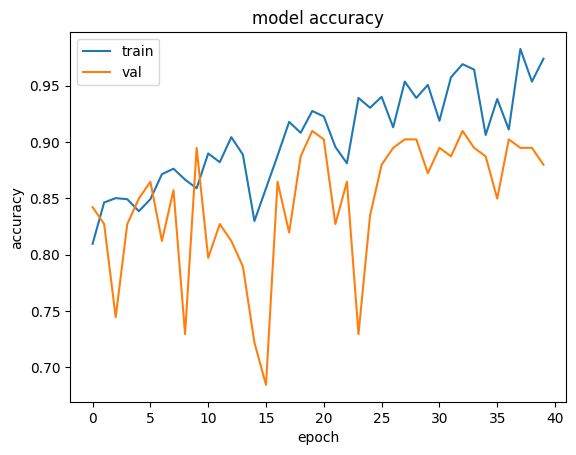

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

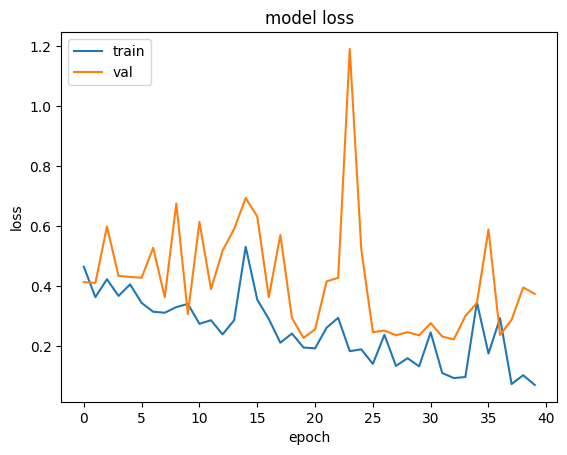

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
model= tf.keras.Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(227, 227, 3), strides=4, padding='valid', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(256, (5, 5), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(Conv2D(384, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(Conv2D(256, (3, 3), activation='relu', strides=1, padding='same', kernel_initializer=weight_initializer))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_initializer=weight_initializer))
model.add(Dense(4096, activation='relu', kernel_initializer=weight_initializer))
model.add(Dense(3, activation='softmax'))


model.summary()

opt= tf.keras.optimizers.SGD(learning_rate=0.01)
loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics= ['accuracy']

model.compile(optimizer=opt, loss=loss, metrics=metrics)

history=model.fit(train_set_normalized, epochs=40, validation_data=validation_set_normalized)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 384)      

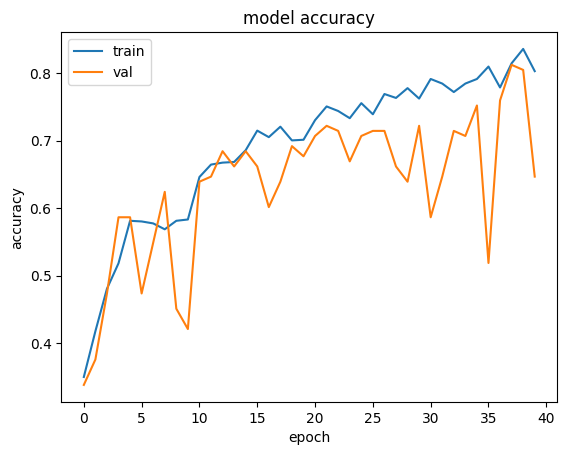

In [27]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


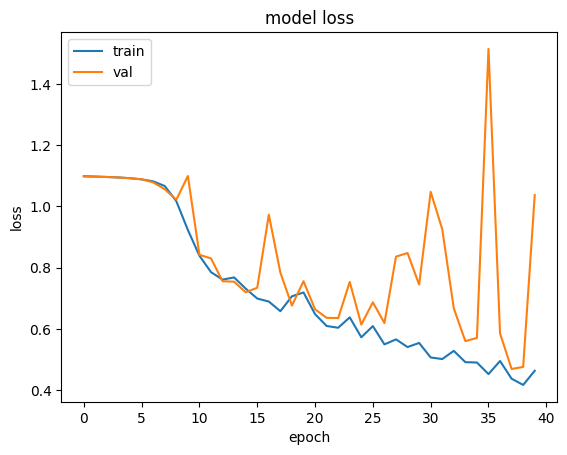

In [28]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
conv_layers = [layer.name for layer in model.layers if "conv" in layer.name]
classes = ["angular_leaf_spot", "bean_rust", "healthy"]

In [33]:
import numpy as np

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    batch_size=None,
    image_size=(227, 227),
    shuffle=False)

def extract_images(dataset, label_value):
    for img, label in dataset.filter(lambda img, label: label == label_value).take(1):
        extracted_image = np.expand_dims(img.numpy(), axis=0)
        return extracted_image

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))



Found 1034 files belonging to 3 classes.


In [42]:
from tensorflow.keras import Model
from tensorflow.keras import models

In [43]:
angular_leaf_spot = extract_images(train_set, 0)
bean_rust = extract_images(train_set, 1)
healthy = extract_images(train_set, 2)

leaf_images = [angular_leaf_spot, bean_rust, healthy]

angular_leaf_spot_normalized = extract_images(train_set_normalized, 0)
bean_rust_normalized = extract_images(train_set_normalized, 1)
healthy_normalized = extract_images(train_set_normalized, 2)

leaf_images_normalized = [angular_leaf_spot_normalized, bean_rust_normalized, healthy_normalized]

prediction_cache = {}
def visualize_feature_maps(layer_idx, class_idx):
    layer_output = model.get_layer(conv_layers[layer_idx]).output
    test_model = models.Model(inputs=model.inputs, outputs=layer_output)

    if (layer_idx, class_idx) not in prediction_cache:
        prediction_cache[(layer_idx, class_idx)] = test_model.predict(leaf_images_normalized[class_idx])
    feature_maps = prediction_cache[(layer_idx, class_idx)]

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(2,3,1)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax1.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax2 = plt.subplot(2,3,2)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax2.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax3 = plt.subplot(2,3,3)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax3.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax4 = plt.subplot(2,1,2)
    plt.imshow(leaf_images[class_idx][0]/255.)

    axes = [ax1, ax2, ax3, ax4]
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.xlabel(f"Image Class: {classes[class_idx]}")
    plt.show()

In [31]:
print(conv_layers)

['conv2d_17', 'conv2d_18', 'conv2d_19', 'conv2d_20', 'conv2d_21']


1/1 [==============================] - 0s 94ms/step


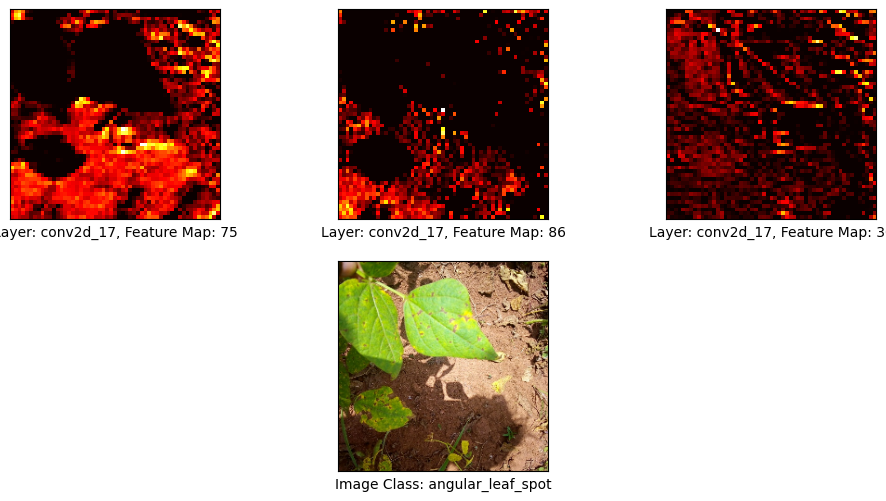

In [44]:
visualize_feature_maps(0, 0)

1/1 [==============================] - 0s 56ms/step


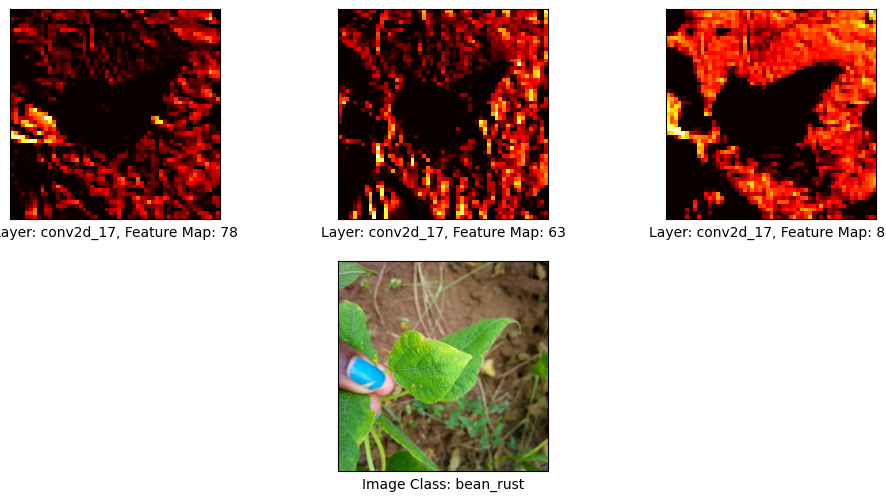

In [45]:
visualize_feature_maps(0, 1)

1/1 [==============================] - 0s 51ms/step


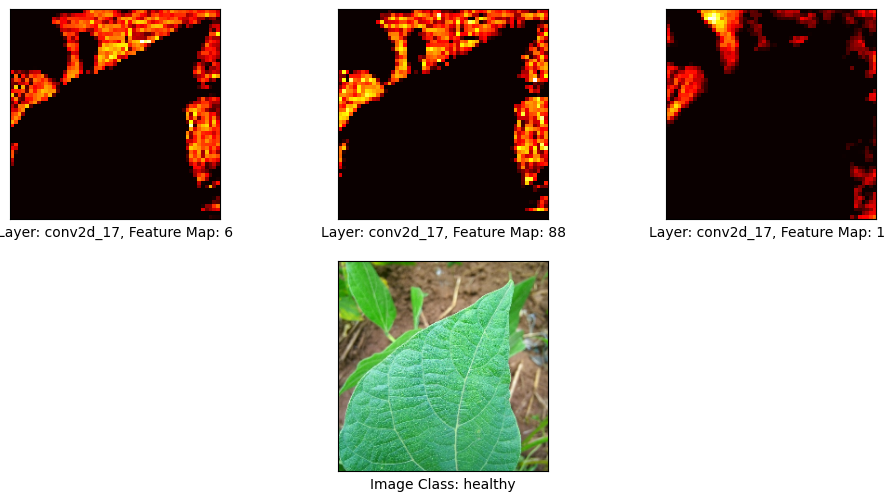

In [46]:
visualize_feature_maps(0, 2)

1/1 [==============================] - 0s 292ms/step


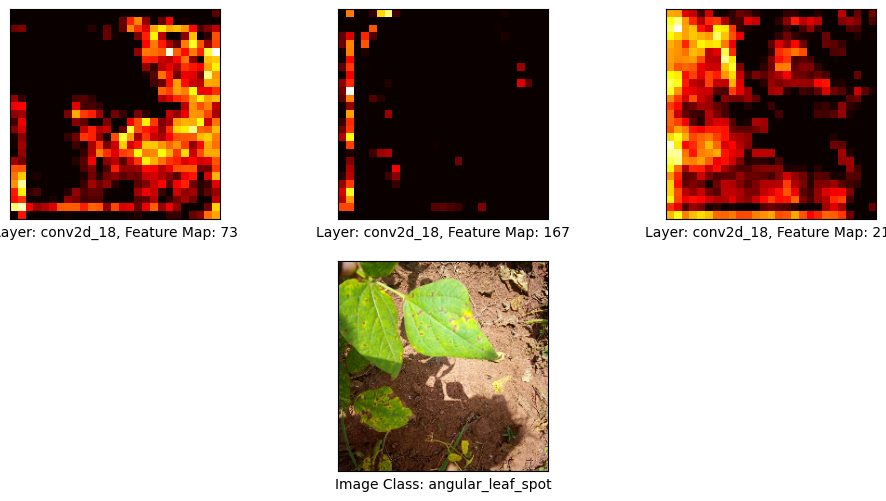

In [47]:
visualize_feature_maps(1, 0)